In [18]:
from copy import deepcopy
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

import src.finite as finite
import src.infinite as infinite
from src.utils import plot_dynamics

## Population dynamics

- Target function is $f(x)=x_1 = \sigma(x_1)-\sigma(-x_1)$, which is actually a RKHS function.
- The network is over-parameterized in the sense that there exist many solutions
- The experiment show that GD tends to pick up the sparse solution

In [4]:
target = 'linear'
m = 20
d = 19

nn = infinite.Train(m, d, target=target)
nn.run(nepochs=20000, learning_rate=1e-2, TOL=5e-6, plot_epoch=2000, check_epoch=50)

[1/20000], 6.3e+00
[2001/20000], 6.5e-04
[4001/20000], 1.3e-04
[6001/20000], 4.6e-05
[8001/20000], 2.1e-05
[10001/20000], 1.0e-05
[12001/20000], 5.4e-06


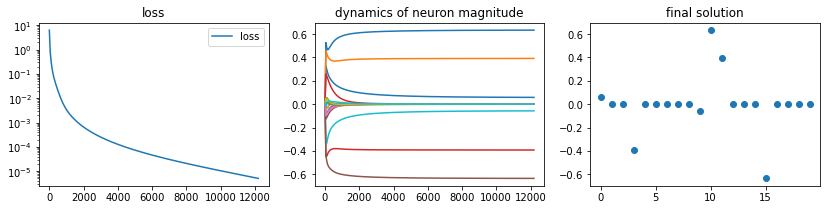

In [5]:
plot_dynamics(nn, label='infinite')

## The empirical dynamics for $m\sim n/(d+1)$
- We see that GD still tends to find the sparse solution for empirical dynamics, even when the sample size is smaller than the number of parameters. 

In [12]:
target = 'linear'
n = 300
m = 20
d = 19

nn = finite.Train(m, n, d, target=target, save_aB=True)
nn.run(nepochs=50000, learning_rate=1e-2, TOL=1e-5, plot_epoch=2500, check_epoch=50)

0-th iter, loss: 1.1e+00
2500-th iter, loss: 8.6e-03
5000-th iter, loss: 3.6e-03
7500-th iter, loss: 2.3e-03
10000-th iter, loss: 1.7e-03
12500-th iter, loss: 1.4e-03
15000-th iter, loss: 1.1e-03
17500-th iter, loss: 9.8e-04
20000-th iter, loss: 8.4e-04
22500-th iter, loss: 6.9e-04
25000-th iter, loss: 6.0e-04
27500-th iter, loss: 5.2e-04
30000-th iter, loss: 4.6e-04
32500-th iter, loss: 4.2e-04
35000-th iter, loss: 3.8e-04
37500-th iter, loss: 3.6e-04
40000-th iter, loss: 3.3e-04
42500-th iter, loss: 3.1e-04
45000-th iter, loss: 2.9e-04
47500-th iter, loss: 2.8e-04


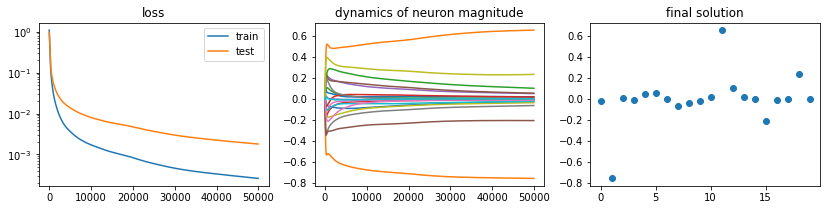

In [13]:
plot_dynamics(nn)

## The empirical dynamics for $m\sim n$
- In this regime, the solution is not sparse any more

In [23]:
target = 'linear'
n = 300
m = 300
d = 19

nn = finite.Train(m, n, d, target=target, save_aB=True)
net0 = deepcopy(nn.net)
nn.run(nepochs=40000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50)

0-th iter, loss: 1.0e+00
2500-th iter, loss: 2.6e-03
5000-th iter, loss: 1.5e-03
7500-th iter, loss: 1.0e-03
10000-th iter, loss: 7.4e-04
12500-th iter, loss: 5.6e-04
15000-th iter, loss: 4.4e-04
17500-th iter, loss: 3.5e-04
20000-th iter, loss: 2.8e-04
22500-th iter, loss: 2.3e-04
25000-th iter, loss: 1.9e-04
27500-th iter, loss: 1.5e-04
30000-th iter, loss: 1.3e-04
32500-th iter, loss: 1.1e-04
35000-th iter, loss: 9.1e-05
37500-th iter, loss: 7.7e-05


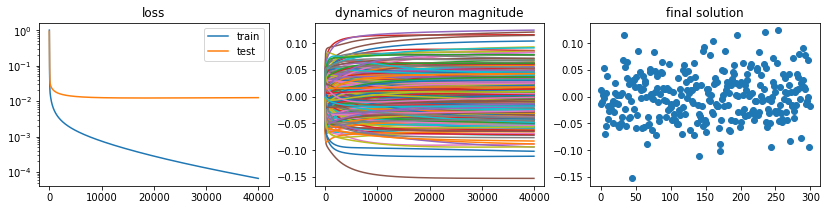

In [24]:
plot_dynamics(nn)

In [25]:
target = 'linear'
n = 300
m = 300
d = 19

rf = finite.Train(m, n, d, rf=True, target=target, save_aB=True)
rf.net = net0
rf.run(nepochs=40000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50)

0-th iter, loss: 9.9e-01
2500-th iter, loss: 2.7e-03
5000-th iter, loss: 1.5e-03
7500-th iter, loss: 9.6e-04
10000-th iter, loss: 6.8e-04
12500-th iter, loss: 5.1e-04
15000-th iter, loss: 3.9e-04
17500-th iter, loss: 3.0e-04
20000-th iter, loss: 2.4e-04
22500-th iter, loss: 1.9e-04
25000-th iter, loss: 1.5e-04
27500-th iter, loss: 1.2e-04
30000-th iter, loss: 1.0e-04
32500-th iter, loss: 8.4e-05
35000-th iter, loss: 6.9e-05
37500-th iter, loss: 5.8e-05


- We see that neural networks already degenerate to the random feature model

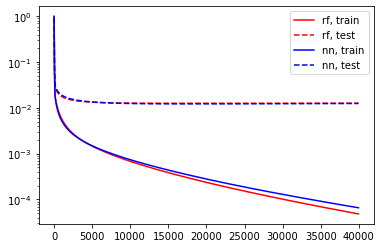

In [30]:
plt.semilogy(rf.nepoch_r, rf.loss_tr_r,'-r', label='rf, train')
plt.semilogy(rf.nepoch_r, rf.loss_te_r,'--r', label='rf, test')

plt.semilogy(nn.nepoch_r, nn.loss_tr_r,'-b', label='nn, train')
plt.semilogy(nn.nepoch_r, nn.loss_te_r,'--b', label='nn, test')

plt.legend()